**Import library**

In [1]:
import pandas as pd

**Load dataset**

In [2]:
df = pd.read_csv(r'D:\Salaries.csv')
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


**Check dataset info**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


**Types of missing value**

- **Missing at Random (MAR)**<br>
  The propensity for a data point to be missing is not related to the missing data, but it is related to some of the observed data.
<br><br>
- **Missing Completely at Random (MCAR)**<br>
  The fact that a certain value is missing has nothing to do with its hypothetical value and with the values of other variables.
<br><br>
- **Missing not at Random (MNAR)**<br> 
  Two possible reasons are that the missing value depends on the hypothetical value (e.g. People with high salaries generally do not want to reveal their incomes in surveys) or missing value is dependent on some other variable’s value (e.g. Assume that females generally don’t want to reveal their ages! Here the missing value in age variable is impacted by gender variable).

In the first two cases (MAR & MCAR), it is safe to remove the data with missing values depending upon their occurrences, while in the third case removing observations with missing values can produce a bias in the model. Thus, we have to be always careful in giving treatments to the missing values.

**Regular function for missing value detection**

In [4]:
# A regular function to check the number of missing value and its percentage.

def missing_values_table(df):
        # Jumlah missing values pada DataFrame
        mis_val = df.isnull().sum()
        
        # Persentase missing values pada DataFrame
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Membuat tabel hasil
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Memberikan nama pada kolom
        mis_val_table_rename_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Mengurutkan berdasarkan persentase dari yang terbesar
        mis_val_table_rename_columns = mis_val_table_rename_columns[
            mis_val_table_rename_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
        
        # Rangkuman informasi terkait missing value
        print (f'DataFrame memiliki {str(df.shape[1])} kolom.\nTerdapat {str(mis_val_table_rename_columns.shape[0])} kolom yang memiliki missing values.')
        
        # Output yang dikembalikan
        return mis_val_table_rename_columns

In [5]:
# Call the function and fill the argument with the DataFrame variable name.
missing_values_table(df)

DataFrame memiliki 13 kolom.
Terdapat 6 kolom yang memiliki missing values.


,Missing Values,% of Total Values
Notes,148654,100.0
Status,148654,100.0
Benefits,36163,24.3
BasePay,609,0.4
OvertimePay,4,0.0
OtherPay,4,0.0


**Detecting missing data visually using Missingno library**

In [6]:
import missingno as msno

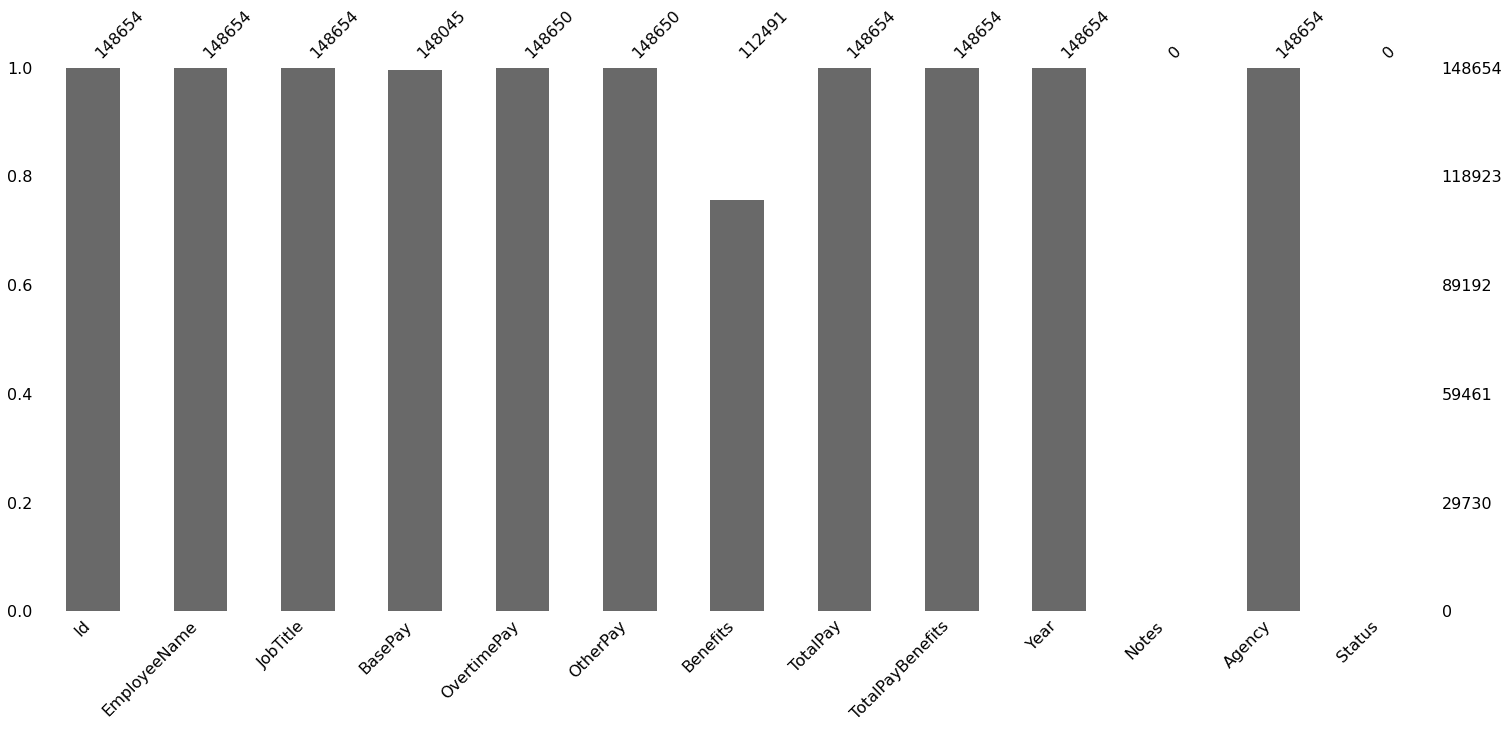

In [7]:
msno.bar(df);

**Visualizing the locations of the missing data**

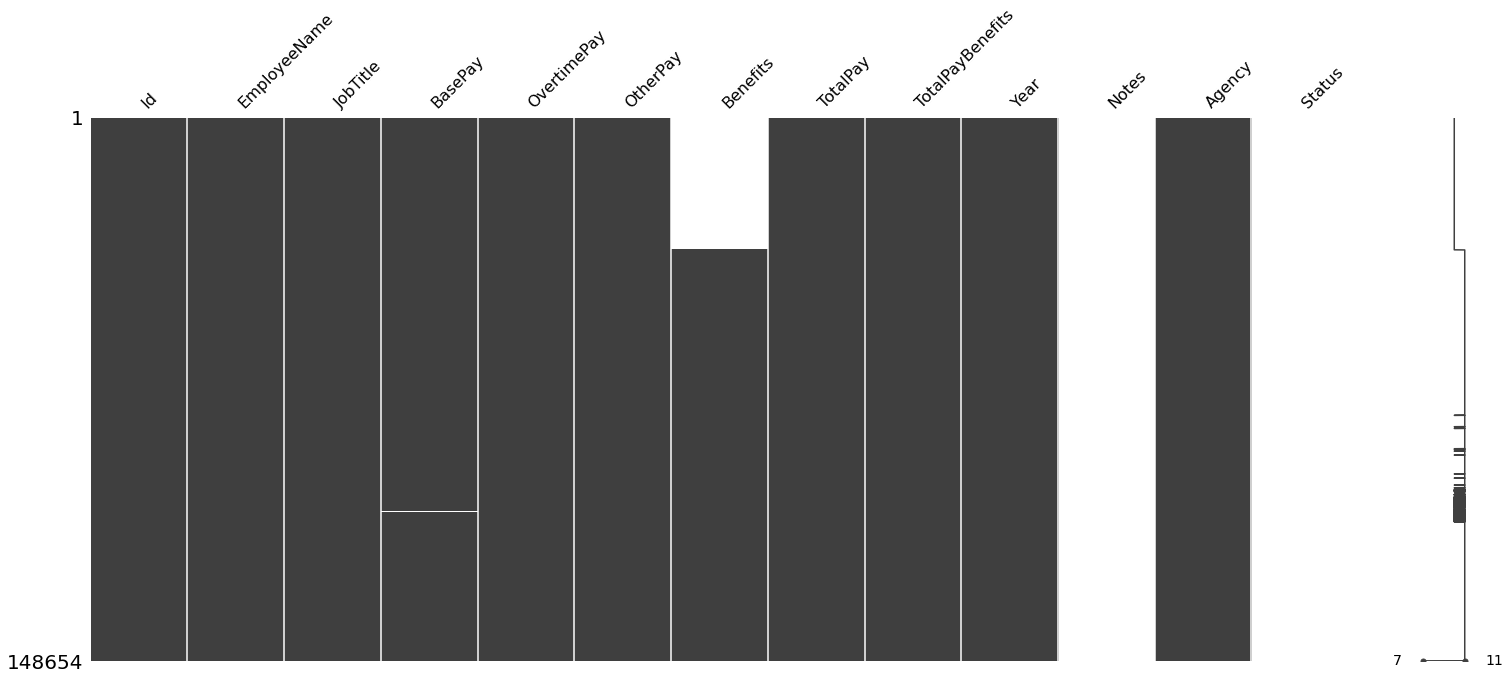

In [8]:
msno.matrix(df);

- If the horizontal white line appears in a column, it means missing values. 

- The sparkline on the right gives an idea of the general shape of the completeness of the data and points out the row with the minimum nullities.

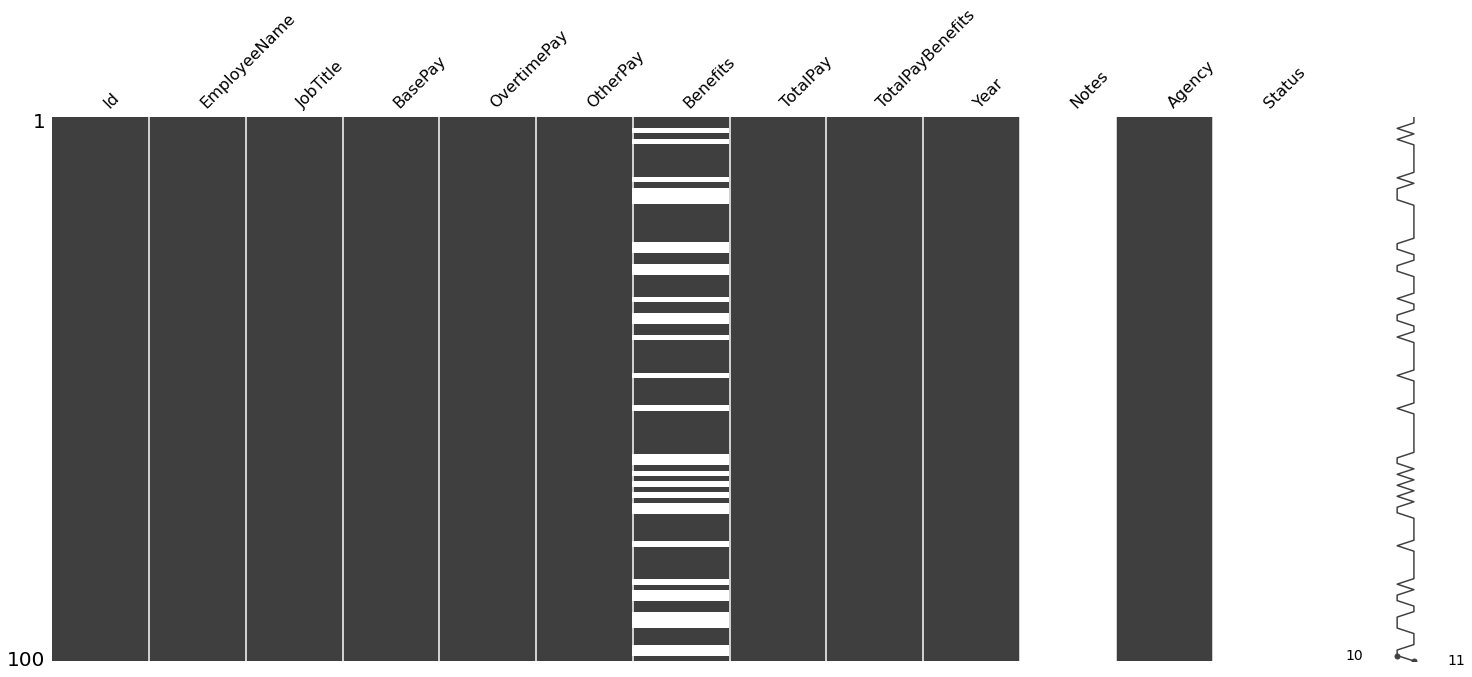

In [9]:
msno.matrix(df.sample(100));

**Missing value deletion treatment**

- Pairwise deletions: deleting only missing values.
- Listwise deletions: deleting the row containing the missing values.
- Dropping entire columns: deleting the column containing the missing values.

**List wise deletion**

In [10]:
# Drop rows which contains any NaN or missing value for Benefits column.
df.dropna(subset=['Benefits'], how='any', inplace=True)
df['Benefits'].isnull().sum()

0

**Dropping entire columns**

In [11]:
cols_with_missing = [col for col in df.columns if df[col].isnull().any()]
cols_with_missing

['BasePay', 'Notes', 'Status']

In [12]:
df.drop(cols_with_missing, axis=1)

,Id,EmployeeName,JobTitle,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
36159,36160,Gary Altenberg,"Lieutenant, Fire Suppression",220909.48,13126.31,44430.12,362844.66,407274.78,2012,San Francisco
36160,36161,Gregory Suhr,Chief of Police,0.00,18974.11,69810.19,321552.11,391362.30,2012,San Francisco
36161,36162,Khoa Trinh,Electronic Maintenance Tech,146415.32,78057.41,53102.29,336393.73,389496.02,2012,San Francisco
36162,36163,Joanne Hayes-White,"Chief, Fire Department",0.00,17816.59,72047.88,314759.60,386807.48,2012,San Francisco
36163,36164,Frederick Binkley,EMT/Paramedic/Firefighter,192424.49,17917.18,44438.25,337204.86,381643.11,2012,San Francisco
...,...,...,...,...,...,...,...,...,...,...
148645,148646,Carolyn A Wilson,Human Services Technician,0.00,0.00,0.00,0.00,0.00,2014,San Francisco
148647,148648,Joann Anderson,Communications Dispatcher 2,0.00,0.00,0.00,0.00,0.00,2014,San Francisco
148648,148649,Leon Walker,Custodian,0.00,0.00,0.00,0.00,0.00,2014,San Francisco
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.00,0.00,2014,San Francisco
